# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [19]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [20]:
%run parse_data.ipynb

df.describe()


,price,age,mrt,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,37.980193,17.712560,1083.885689,24.969030,121.533361
std,13.606488,11.392485,1262.109595,0.012410,0.015347
min,7.600000,0.000000,23.382840,24.932070,121.473530
25%,27.700000,9.025000,289.324800,24.963000,121.528085
50%,38.450000,16.100000,492.231300,24.971100,121.538630
75%,46.600000,28.150000,1454.279000,24.977455,121.543305
max,117.500000,43.800000,6488.021000,25.014590,121.566270


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [21]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [22]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'price': 3, 'age': 3, 'mrt': 3, 'latitude': 3, 'longitude':3}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,price,age,mrt,latitude,longitude
mean,37.98,17.713,1083.886,24.969,121.533
median,38.45,16.100,492.231,24.971,121.539
mode,24.70,0.000,289.325,24.974,121.543


<br>

Let's repeat for a dispersion table:

</br>

In [23]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'price': 3, 'age': 3, 'mrt': 3, 'latitude': 3, 'longitude':3}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,price,age,mrt,latitude,longitude
st.dev.,13.59,11.379,1260.584,0.012,0.015
min,7.60,0.000,23.383,24.932,121.474
max,117.50,43.800,6488.021,25.015,121.566
range,109.90,43.800,6464.638,0.083,0.093
25th,27.70,9.025,289.325,24.963,121.528
75th,46.60,28.150,1454.279,24.977,121.543
IQR,18.90,19.125,1164.954,0.014,0.015


Let's save the variables in easier-to-use variable names:

In [6]:
y    = df['price']
age = df['age']
mrt = df['mrt']
lat = df['latitude']
long = df['longitude']

Let's create scatterplots for the DV (quality) vs. each of the three IVs (acid, density, sugar):

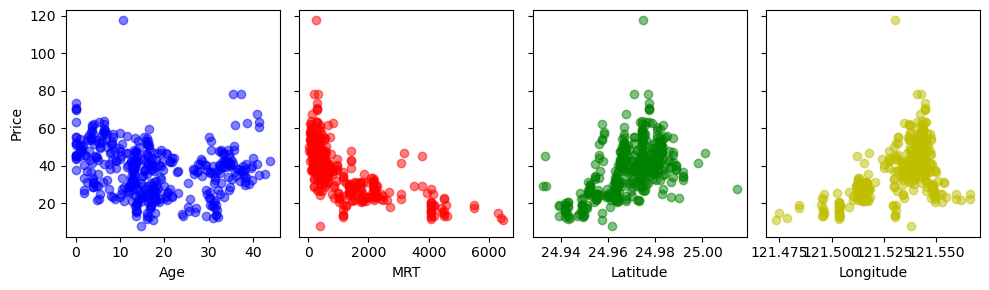

In [25]:

fig,axs = plt.subplots( 1, 4, figsize=(10,3), tight_layout=True )
axs[0].scatter( age, y, alpha=0.5, color='b' )
axs[1].scatter( mrt, y, alpha=0.5, color='r' )
axs[2].scatter( lat, y, alpha=0.5, color='g' )
axs[3].scatter( long, y, alpha=0.5, color='y' )

xlabels = 'Age', 'MRT', 'Latitude', 'Longitude' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Price')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [26]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


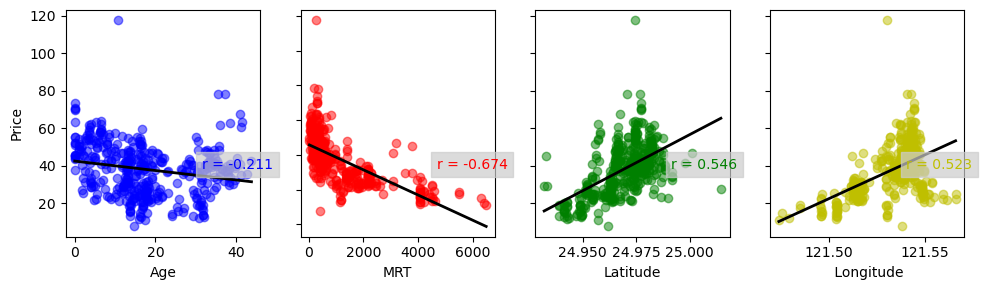

In [30]:
    
fig,axs = plt.subplots( 1, 4, figsize=(10,3), tight_layout=True )
ivs     = [age, mrt, lat, long]
colors  = 'b', 'r', 'g', 'y'
for ax,x,c in zip(axs, ivs, colors):
    ax.scatter( x, y, alpha=0.5, color=c )
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r   = corrcoeff(x, y)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

xlabels = 'Age', 'MRT', 'Latitude',' Longitude'  
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Price')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

The correlation coefficients are considerable high and positive for the Latitude and Longitude parameters, suggesting a relatively clear linear correlation between the them with the IV.

On the other hand, for the Age and MRT parameters, it appears that there may be negative correlation with the IV being the one with the Age parameter a moderate correlation, while for the MRT paramenter a considerably stronger correlation with the IV.

These analyses show that the trends associated with just the means are clear overall.

Let's now assemble all results into a single figure for reporting purposes:

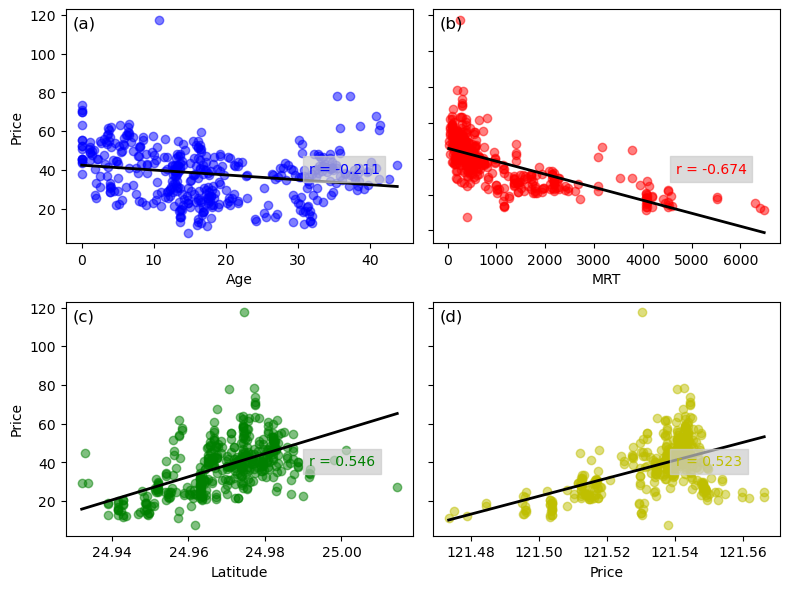

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

In [29]:
def plot_descriptive():
    
    fig,axs = plt.subplots( 2, 2, figsize=(8,6), tight_layout=True )
    ivs     = [age, mrt, lat, long]
    colors  = 'b', 'r', 'g', 'y'
    for ax,x,c in zip(axs.ravel(), ivs, colors):
        ax.scatter( x, y, alpha=0.5, color=c )
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r   = corrcoeff(x, y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    xlabels = 'Age', 'MRT', 'Latitude',' Longitude' 
    [ax.set_xlabel(s) for ax,s in zip(axs.ravel(),xlabels)]
    [ax.set_ylabel('Price') for ax in axs[:,0]]
    [ax.set_yticklabels([])  for ax in axs[:,1]]

    ax.set_xlabel('Price')

    panel_labels = 'a', 'b', 'c', 'd'
    [ax.text(0.02, 0.92, f'({s})', size=12, transform=ax.transAxes)  for ax,s in zip(axs.ravel(), panel_labels)]
    plt.show()
    
    display_title('Correlations amongst main variables.', pref='Figure', num=1)

    
plot_descriptive()